# Breast Cancer Classification using Decision Tree

This notebook implements a full machine learning pipeline using the **Breast Cancer Wisconsin (Diagnostic)** dataset.
The goal is to build a classifier using `DecisionTreeClassifier` and optimize it using **Hill-Climbing** and compare it with **Grid Search**.

---

**Steps Covered:**
1. Load and clean dataset  
2. Exploratory Data Analysis  
3. using MinMaxScaler  
4. Create fuzzy features  
5. Train Decision Tree using Hill-Climbing  
6. Compare with Grid Search  
7. Visualize the final tree  
8. Evaluate on the test set  


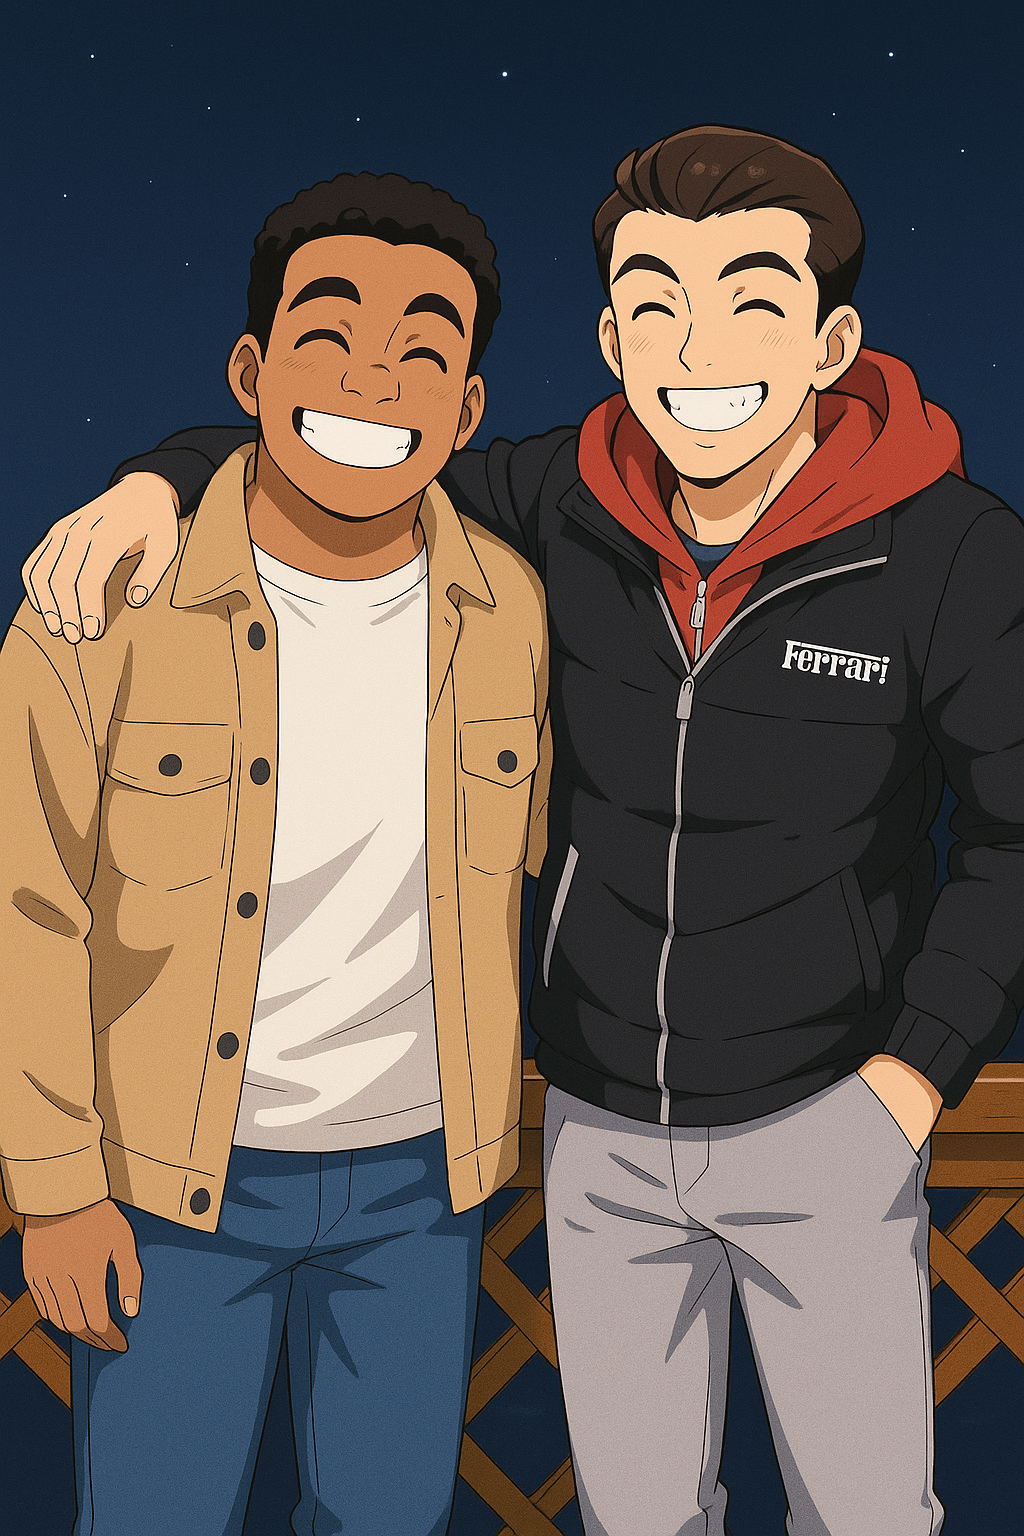

In [1]:
from PIL import Image
from IPython.display import display

img = Image.open('../final project/img/final.png')

display(img)

load data

In [2]:
from ucimlrepo import fetch_ucirepo

data = fetch_ucirepo(id=17)
X = data.data.features
y = data.data.targets

print(data.metadata)  
print(data.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

explore

In [3]:
df = X.copy()
df['Diagnosis'] = y
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

In [4]:
print(f"dimensions of the data is : {df.shape}")
df.info()

dimensions of the data is : (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2       

In [5]:
df.describe()

radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.064920    0.029560         0.020310    0.161900   
50%        0.092630    0.061540         0.033500    0.179200   
75%        0.130400    0.130700         0.074000    0.195700   
max        0.345400    0.426800         0.201200    0.304000   

       fractal_dimension1  ...    texture3  perimeter3        area3  \
count          569.000000  ...  569.000000  569.000000   569.000000   
mean             0.062798  ...   25.677223  107.261213   880.583128   
std              0.007060  ...    6.146258   33.602542   569.356993   
min              0.049960  ...   12.020000   50.410000   185.200000   
25%              0.057700  ...   21.080000   84.110000   515.300000   
50%              0.061540  ...   25.410000   97.660000   686.500000   
75%              0.066120  ...   29.720000  125.400000  1084.000000   
max              0.097440  ...   49.540000  251.200000  4254.000000   

       smoothness3  compactness3  concavity3  concave_points3   symmetry3  \
count   569.000000    569.000000  569.000000       569.000000  569.000000   
mean      0.132369      0.254265    0.272188         0.114606    0.290076   
std       0.022832      0.157336    0.208624         0.065732    0.061867   
min       0.071170      0.027290    0.000000         0.000000    0.156500   
25%       0.116600      0.147200    0.114500         0.064930    0.250400   
50%       0.131300      0.211900    0.226700         0.099930    0.282200   
75%       0.146000      0.339100    0.382900         0.161400    0.317900   
max       0.222600      1.058000    1.252000         0.291000    0.663800   

       fractal_dimension3   Diagnosis  
count          569.000000  569.000000  
mean             0.083946    0.372583  
std              0.018061    0.483918  
min              0.055040    0.000000  
25%              0.071460    0.000000  
50%              0.080040    0.000000  
75%              0.092080    1.000000  
max              0.207500    1.000000  

[8 rows x 31 columns]

clean

In [6]:
# print(f"Missing values per column: {df.isnull().sum()}")
print(f"Missing values in all columns: {df.isnull().sum().sum()}")
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

Missing values in all columns: 0

Number of duplicate rows: 0


split

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


**visualization**

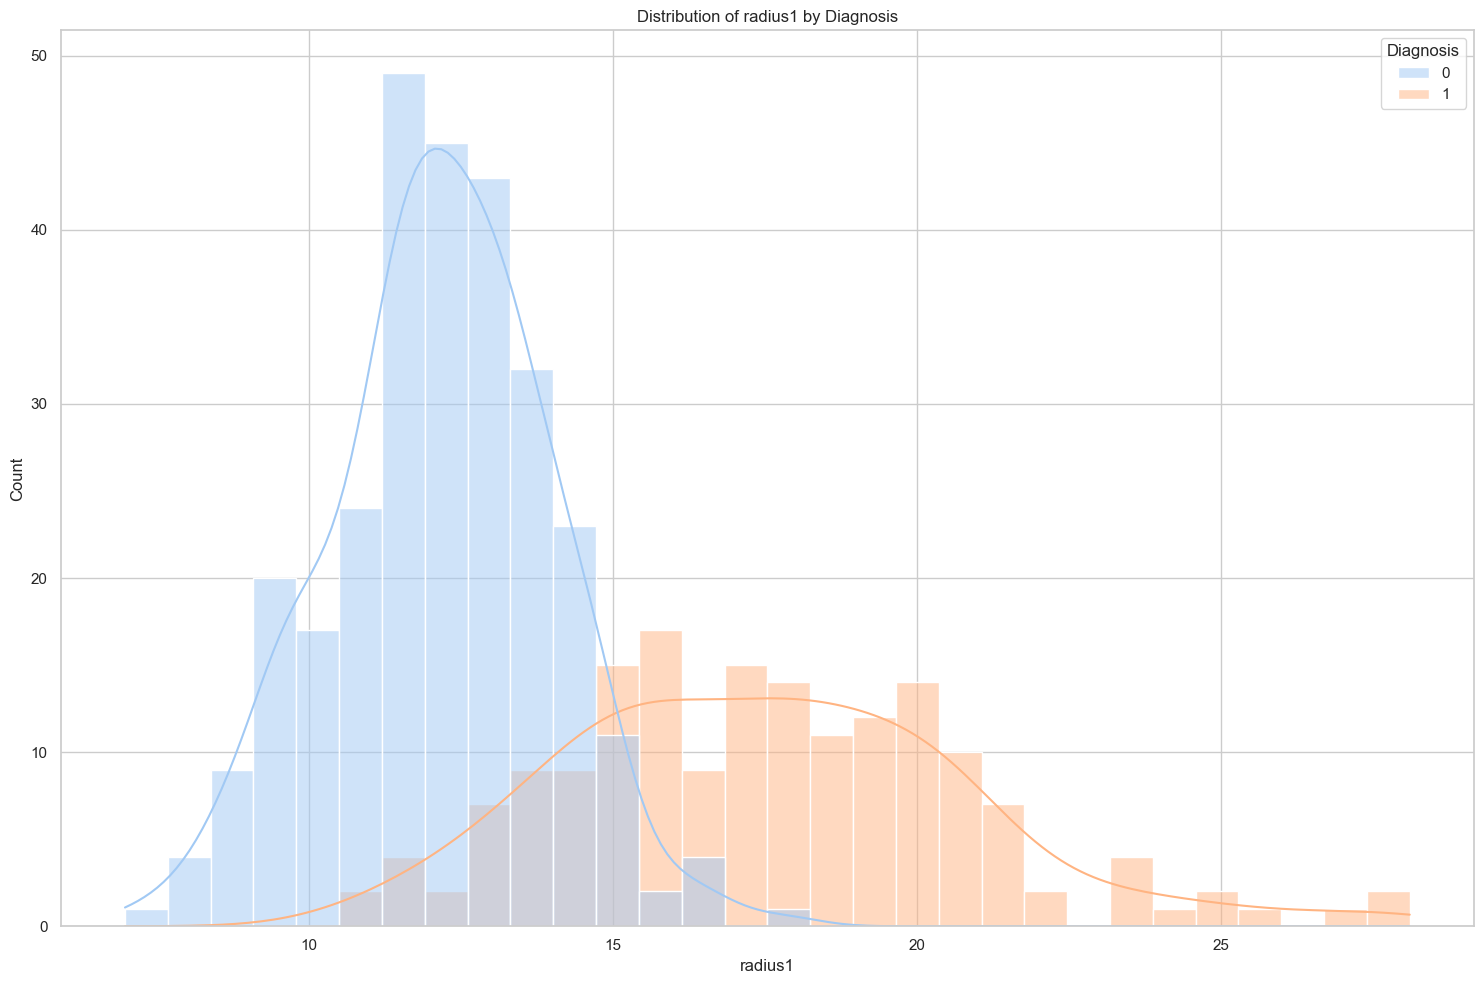

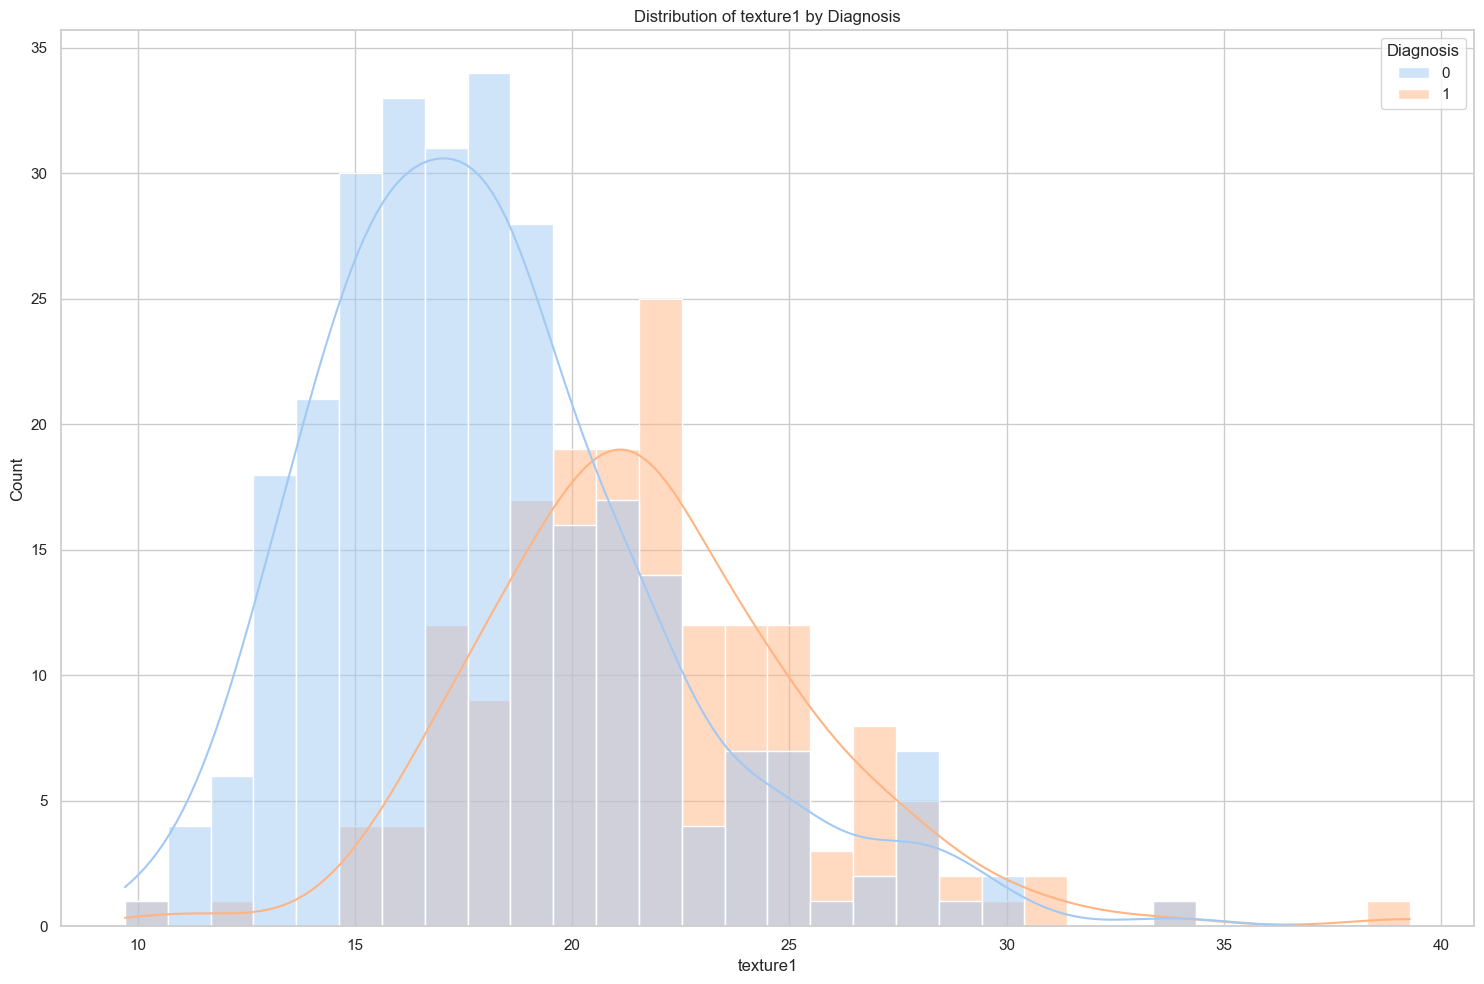

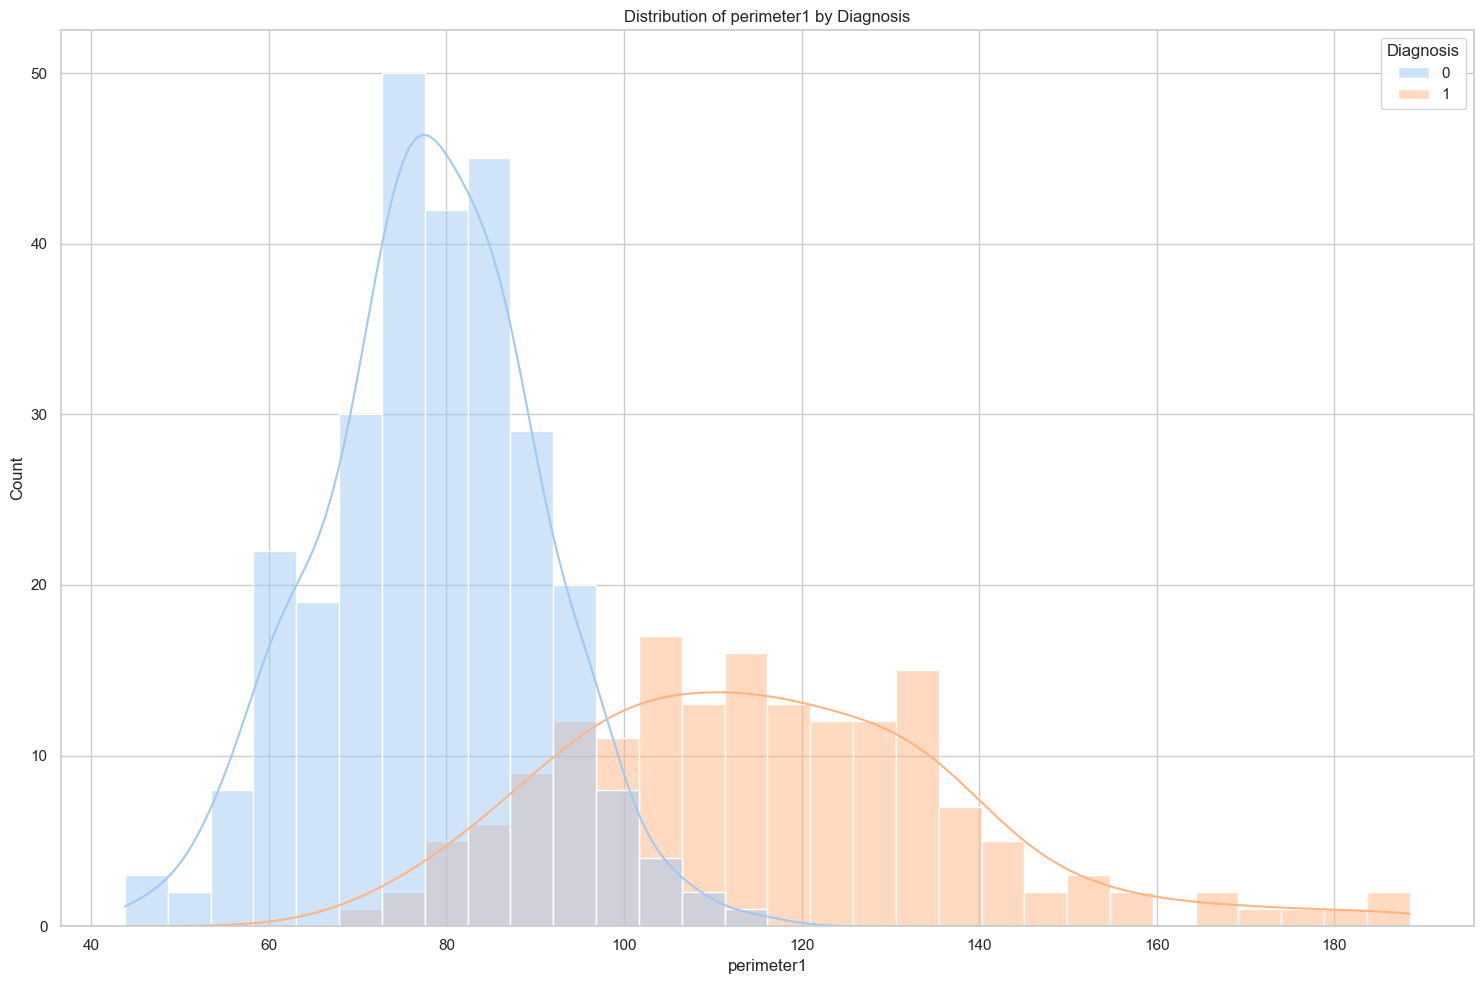

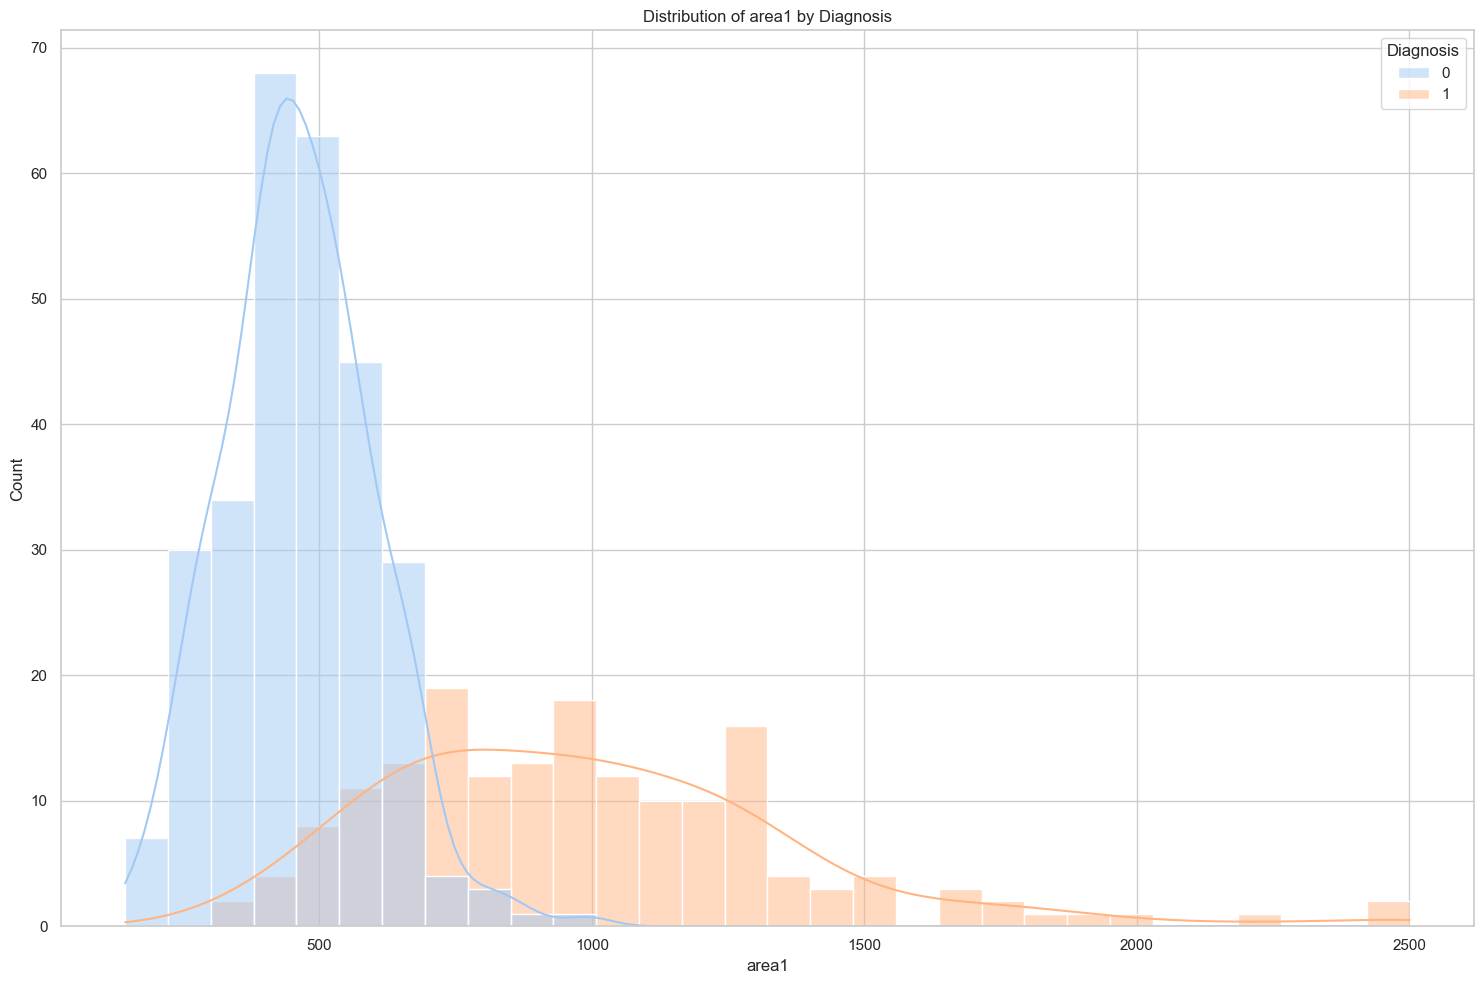

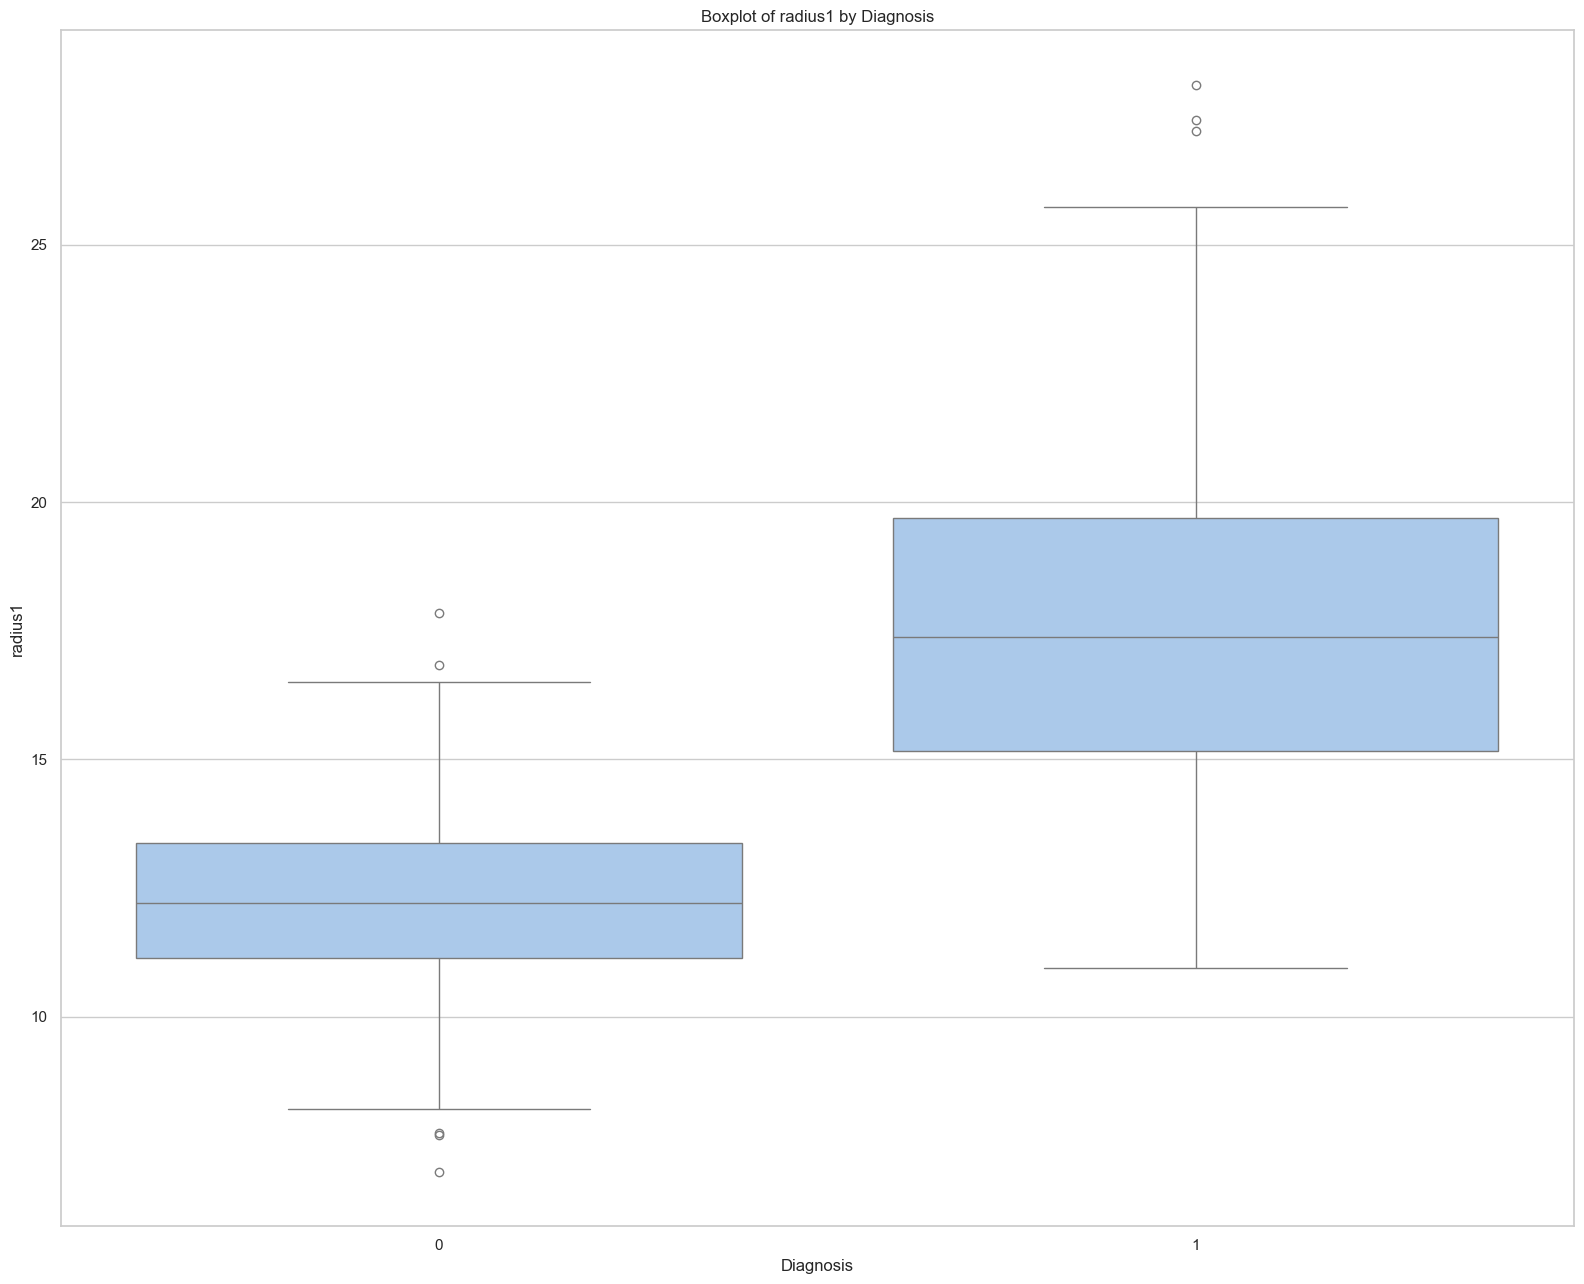

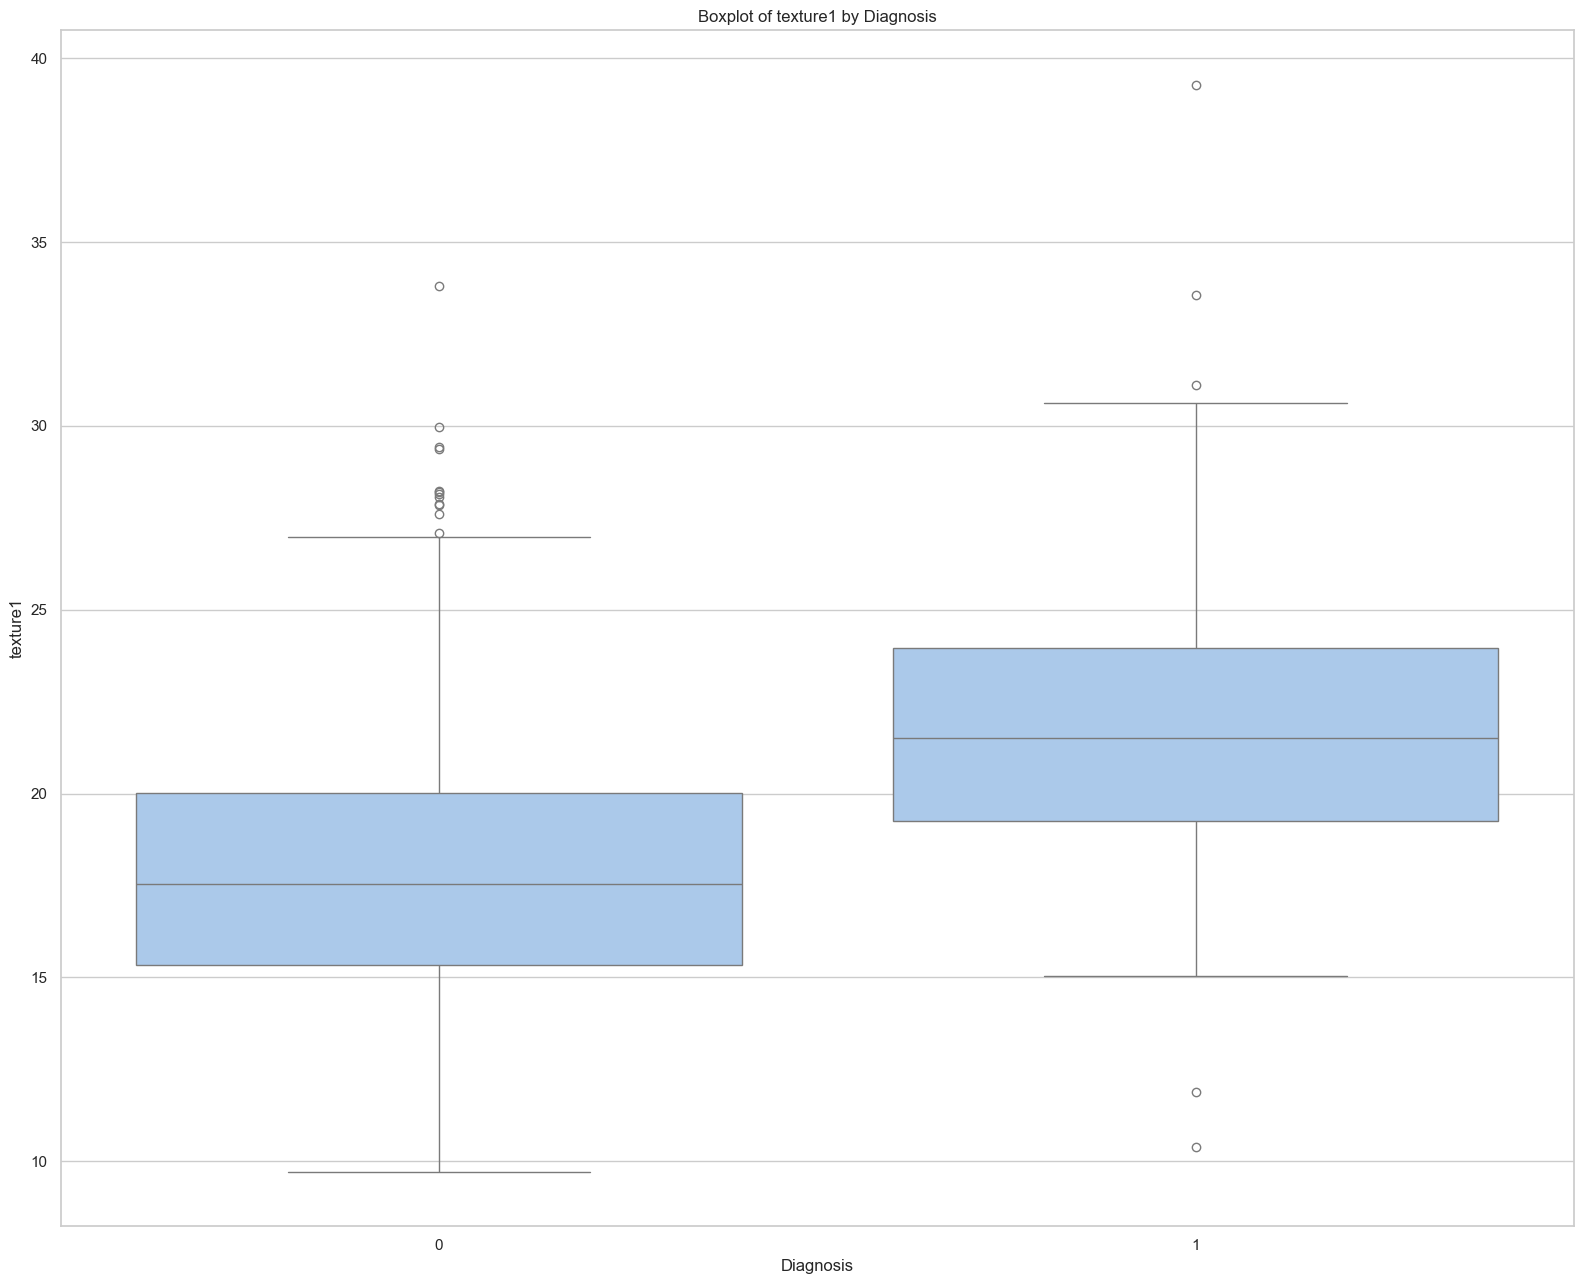

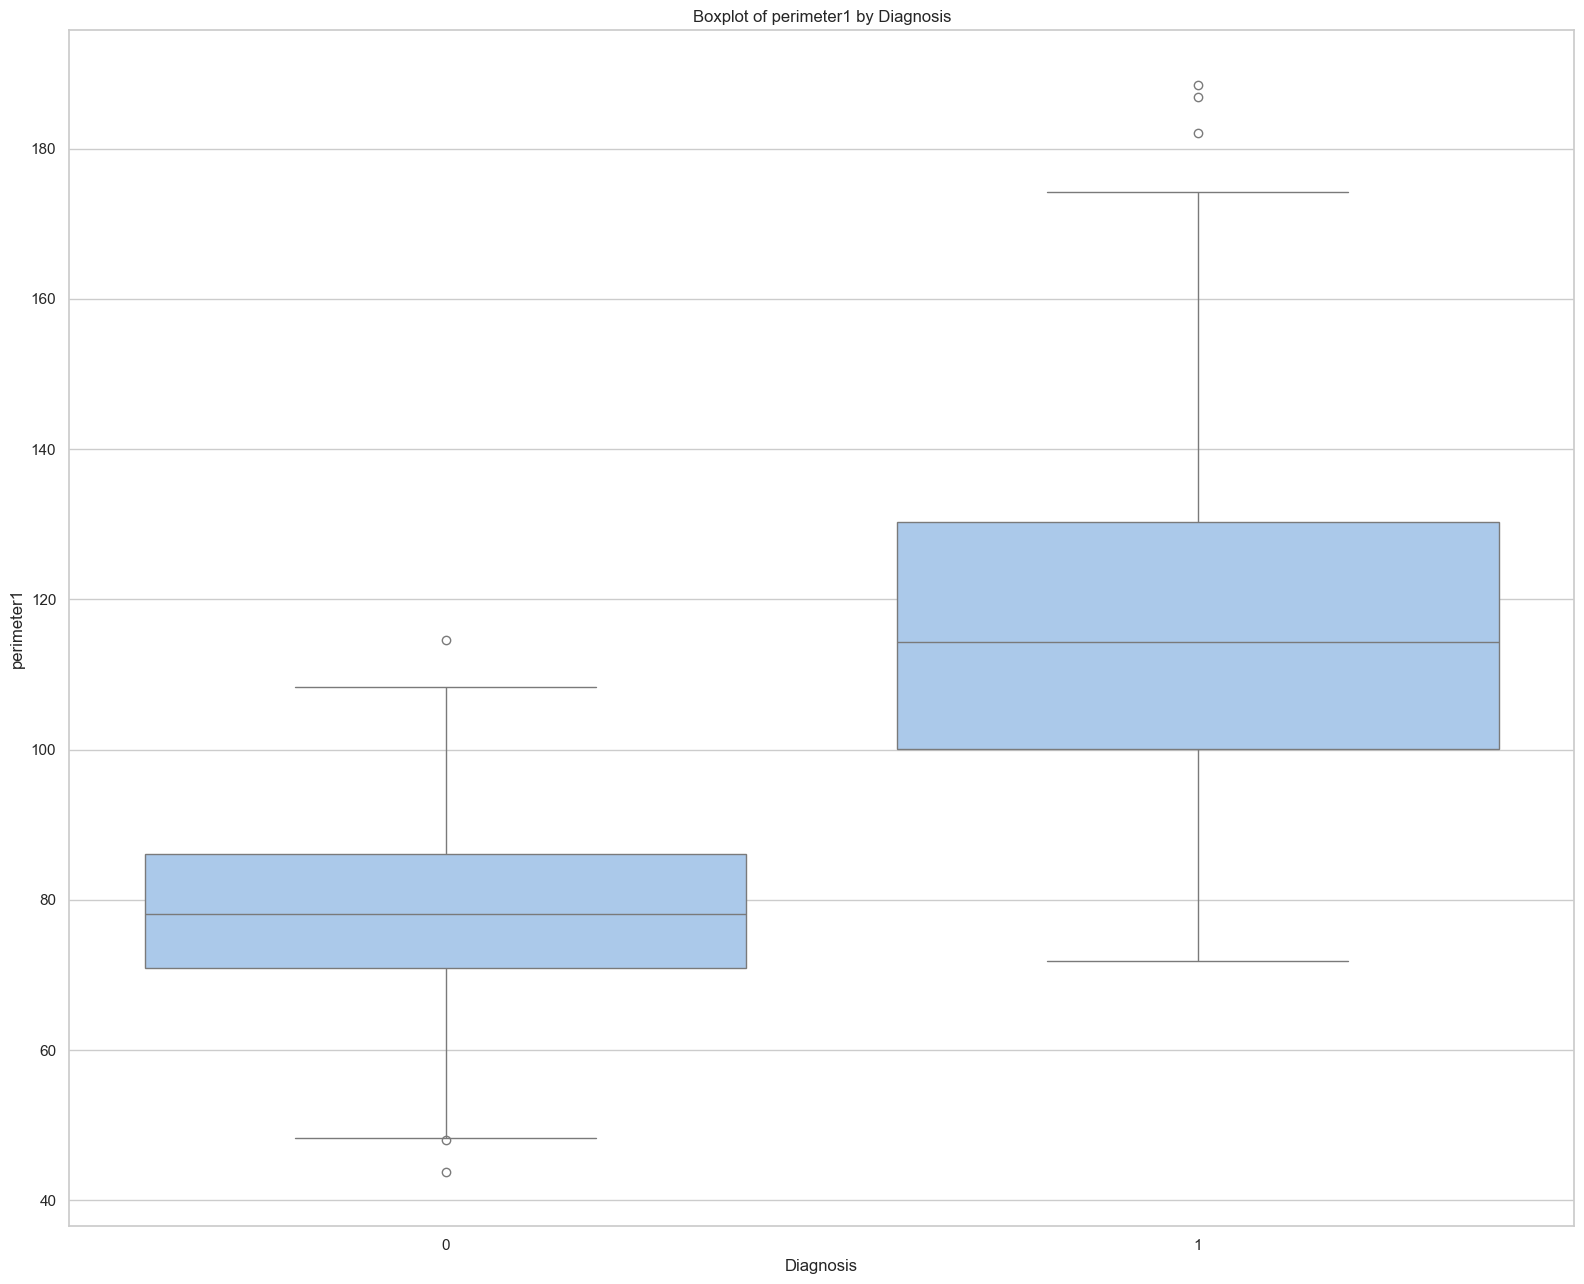

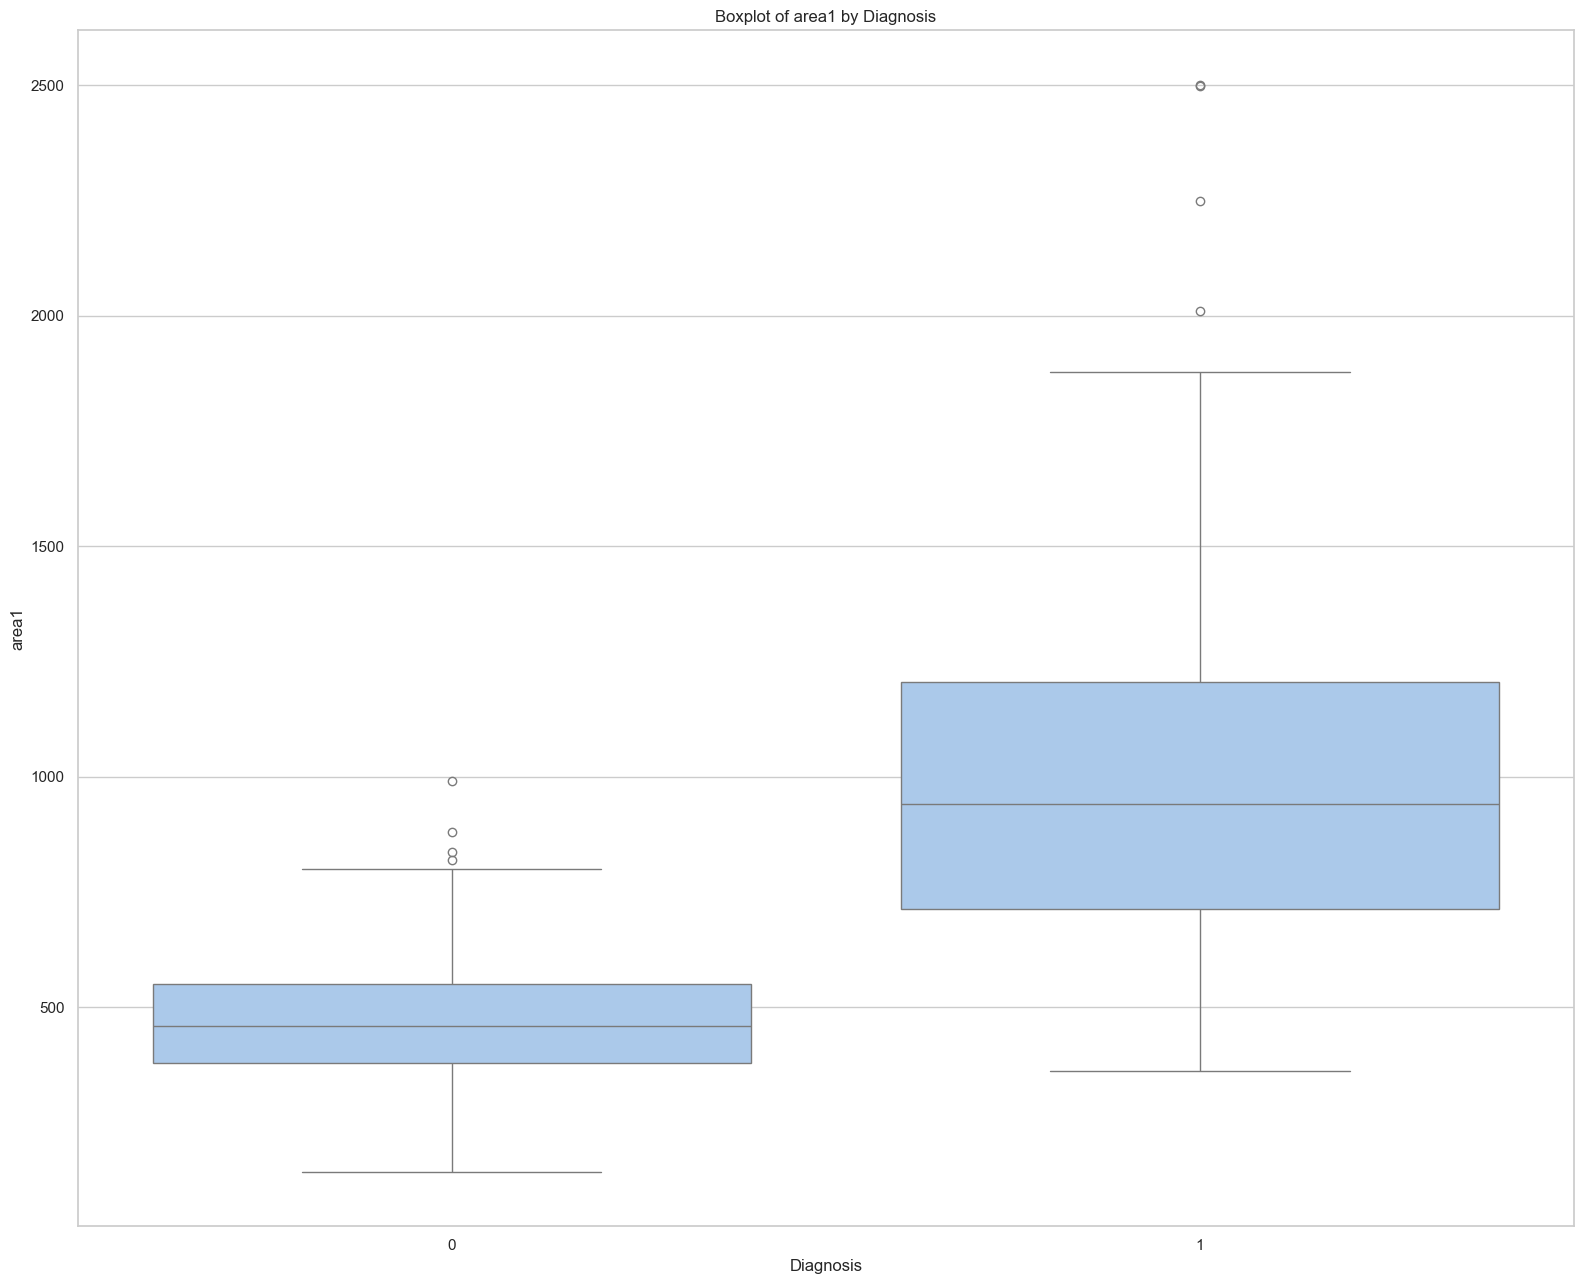

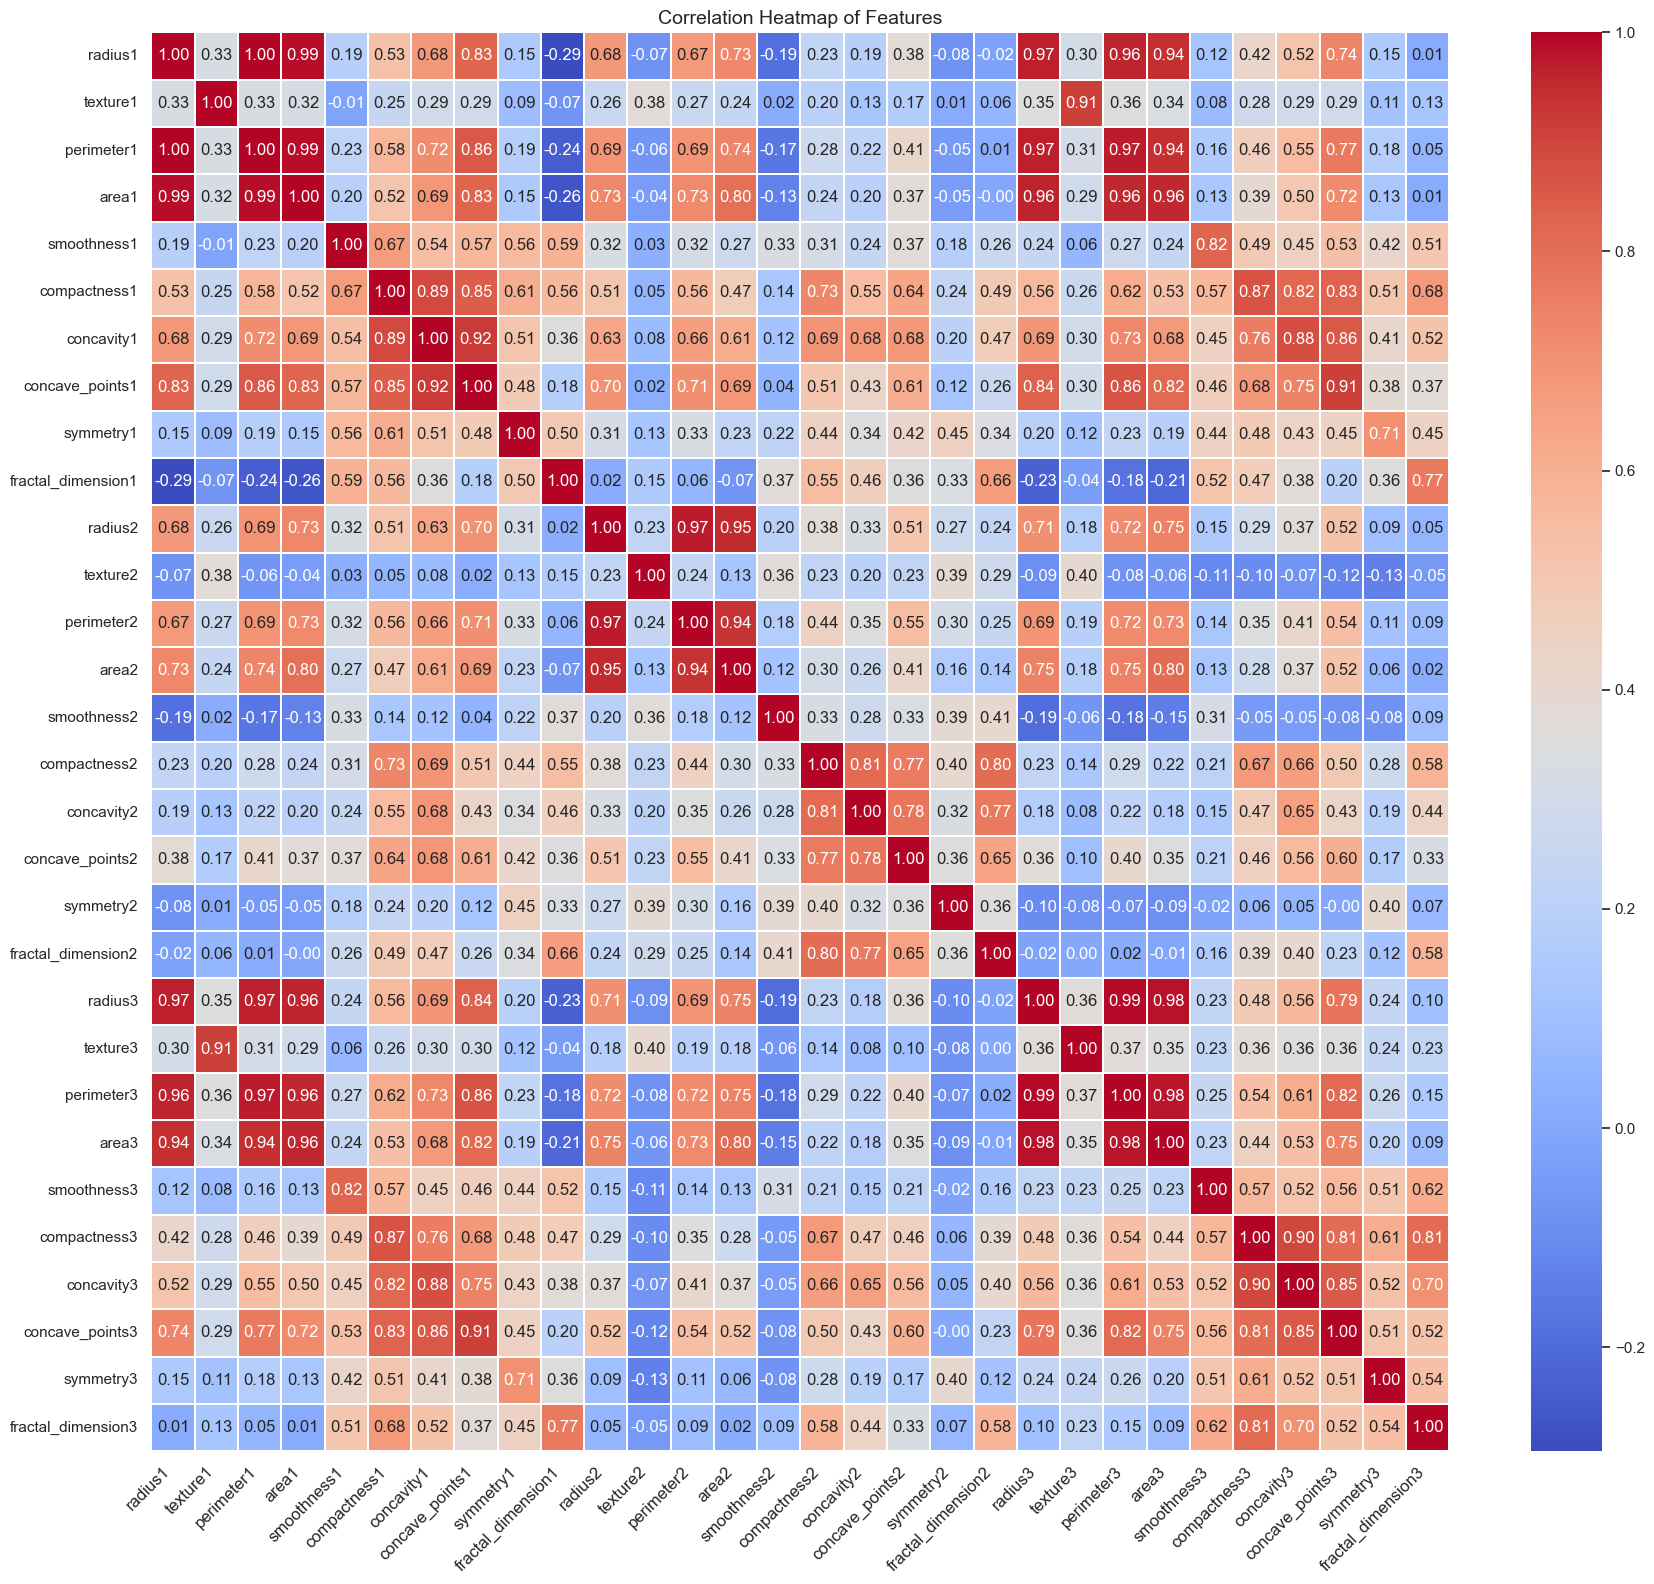

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

train_df = X_train.copy()
train_df['Diagnosis'] = y_train

#? Histogram
features_to_plot = ['radius1', 'texture1', 'perimeter1', 'area1']
sns.set(style="whitegrid", palette="pastel")

for feature in features_to_plot:
    plt.figure(figsize=(15, 10))
    sns.histplot(data=train_df, x=feature, hue='Diagnosis', kde=True, bins=30)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.tight_layout()
    plt.show()

#? Boxplot
for feature in features_to_plot:
    plt.figure(figsize=(16, 13))
    sns.boxplot(data=train_df, x='Diagnosis', y=feature)
    plt.title(f'Boxplot of {feature} by Diagnosis')
    plt.tight_layout()
    plt.show()

#? Correlation heatmap

plt.figure(figsize=(18, 16))  
corr = train_df.drop(columns='Diagnosis').corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.3,
)

plt.xticks(rotation=45, ha='right', fontsize=12)

plt.title("Correlation Heatmap of Features", fontsize=14)
plt.tight_layout()
plt.show()

normalization

In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
print("Sample of scaled training data:")
print(X_train_scaled.head())

Sample of scaled training data:
      radius1  texture1  perimeter1     area1  smoothness1  compactness1  \
10   0.427801  0.457558    0.407090  0.277540     0.193775      0.145114   
170  0.252686  0.090632    0.242278  0.135992     0.399346      0.154684   
407  0.277770  0.394319    0.268399  0.157370     0.128853      0.195632   
430  0.374793  0.433548    0.402944  0.229692     0.366340      0.623029   
27   0.550381  0.356442    0.541151  0.403181     0.316087      0.267530   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  \
10     0.077296         0.165159   0.236364            0.142585  ...   
170    0.093416         0.183897   0.454040            0.197246  ...   
407    0.143533         0.092793   0.262626            0.230932  ...   
430    0.640347         0.482654   0.495455            0.397034  ...   
27     0.349110         0.384245   0.321717            0.143008  ...   

      radius3  texture3  perimeter3     area3  smoothness3  compactness3  \
10

fuzzy

In [10]:
def triangular_membership(x, a, b, c):
    """
    function to calculate triangular membership function values.
    x: input value(القيمه اللي عايز احسبلها الميمبر شيب )
    a, b, c: membership function parameters
    a->start point (الناحيه اللي ع شمال)
    b->peak point (اقصي شيء )
    c->end point (الناحيه اللي ع يمين)
    return: membership value (قيمة الميمبر شيب)
    """
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)


import numpy as np

#! الخصائص اللي هنشتغل عليها
features = ['radius1', 'area1', 'texture1']

# هنشتغل على بيانات التدريب بس
fuzzy_train = X_train_scaled.copy()
fuzzy_test = X_test_scaled.copy()

for feature in features:
    min_val = fuzzy_train[feature].min()
    max_val = fuzzy_train[feature].max()
    mid_val = fuzzy_train[feature].median()
    
    # Low
    fuzzy_train[f'{feature}_low'] = triangular_membership(fuzzy_train[feature], min_val, min_val, mid_val)
    fuzzy_test[f'{feature}_low'] = triangular_membership(fuzzy_test[feature], min_val, min_val, mid_val)
    
    # Medium
    fuzzy_train[f'{feature}_medium'] = triangular_membership(fuzzy_train[feature], min_val, mid_val, max_val)
    fuzzy_test[f'{feature}_medium'] = triangular_membership(fuzzy_test[feature], min_val, mid_val, max_val)
    
    # High
    fuzzy_train[f'{feature}_high'] = triangular_membership(fuzzy_train[feature], mid_val, max_val, max_val)
    fuzzy_test[f'{feature}_high'] = triangular_membership(fuzzy_test[feature], mid_val, max_val, max_val)
    #TODO:القيمه اللي قريبه من اللو تبقي لو 
    #TODO:القيمه اللي قريبه من الميديم تبقي ميديم
    #TODO:القيمه اللي قريبه من الهاي تبقي هاي

# عرض عينة من البيانات بعد الاضافه الجديدة
print(fuzzy_train[[f'{f}_low' for f in features]].head())
print(fuzzy_train[[f'{f}_medium' for f in features]].head())
print(fuzzy_train[[f'{f}_high' for f in features]].head())

     radius1_low  area1_low  texture1_low
10      0.000000   0.000000      0.000000
170     0.160403   0.204269      0.708379
407     0.077056   0.079176      0.000000
430     0.000000   0.000000      0.000000
27      0.000000   0.000000      0.000000
     radius1_medium  area1_medium  texture1_medium
10         0.818551      0.871380         0.787046
170        0.839597      0.795731         0.291621
407        0.922944      0.920824         0.878803
430        0.894381      0.929090         0.821884
27         0.643196      0.719840         0.933759
     radius1_high  area1_high  texture1_high
10       0.181449     0.12862       0.212954
170      0.000000     0.00000       0.000000
407      0.000000     0.00000       0.121197
430      0.105619     0.07091       0.178116
27       0.356804     0.28016       0.066241


C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_26572\4230000717.py:11: RuntimeWarning: divide by zero encountered in divide
  return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)


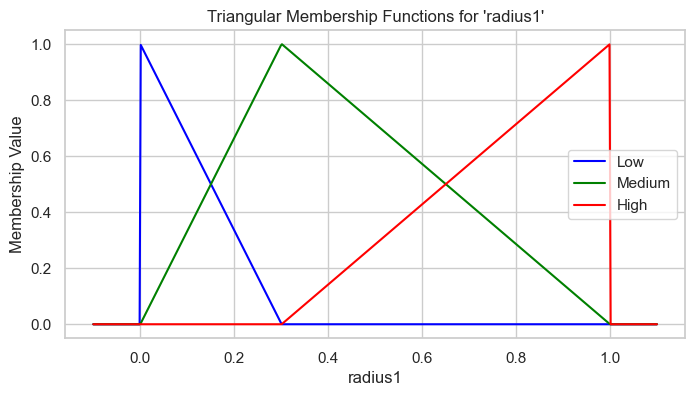

C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_26572\4230000717.py:11: RuntimeWarning: divide by zero encountered in divide
  return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)


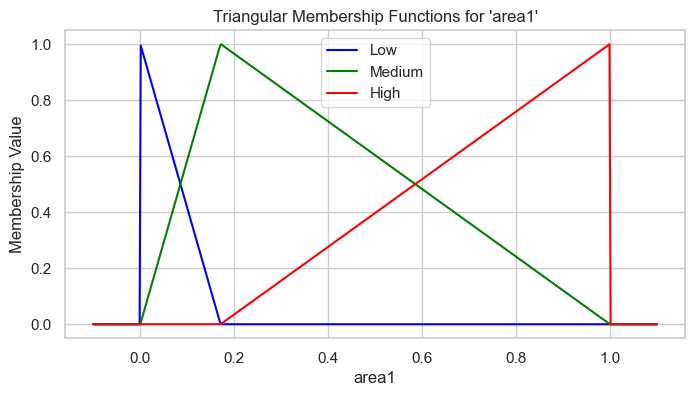

C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_26572\4230000717.py:11: RuntimeWarning: divide by zero encountered in divide
  return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)


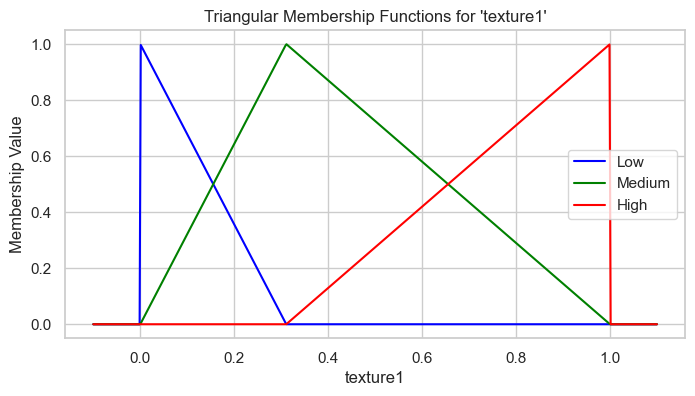

In [11]:

#! رسومات الميبر شيب فنكشن 
def plot_membership_functions(feature_name, min_val, mid_val, max_val):
    x = np.linspace(min_val - 0.1, max_val + 0.1, 500) #& يعني هيوزع 500 نقطة من 0.1 لحد 1.1 علشان يرسم عليها المنحنيات التلاتة
    
    low_y = triangular_membership(x, min_val, min_val, mid_val)
    medium_y = triangular_membership(x, min_val, mid_val, max_val)
    high_y = triangular_membership(x, mid_val, max_val, max_val)
    
    plt.figure(figsize=(8, 4))
    plt.plot(x, low_y, label='Low', color='blue')
    plt.plot(x, medium_y, label='Medium', color='green')
    plt.plot(x, high_y, label='High', color='red')
    
    plt.title(f"Triangular Membership Functions for '{feature_name}'")
    plt.xlabel(feature_name)
    plt.ylabel('Membership Value')
    plt.legend()
    plt.grid(True)
    plt.show()


for feature in features:
    min_val = fuzzy_train[feature].min()
    max_val = fuzzy_train[feature].max()
    mid_val = fuzzy_train[feature].median()
    
    plot_membership_functions(feature, min_val, mid_val, max_val)


tree and hill

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train_final = fuzzy_train.copy()
X_test_final = fuzzy_test.copy()

current_depth = 1
best_depth = current_depth
best_accuracy = 0
accuracy_list = []

while True:
    model = DecisionTreeClassifier(max_depth=current_depth, random_state=42) #* بنبني شجرة بندربها على 
    model.fit(X_train_final, y_train) #* بندربها على بيانات
    y_pred = model.predict(X_train_final) #* بنبدا نتوقع على بيانات التدريب
    acc = accuracy_score(y_train, y_pred) #* بنحسب الدقة
    accuracy_list.append((current_depth, acc)) #* بحفظ الدقة في القايمه ولا مؤخر هههههههه
    
    print(f"[Training] Depth: {current_depth}, Accuracy: {acc:.4f}")
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_depth = current_depth
        current_depth += 1
    else:
        print("No improvement — stopping search")
        break

[Training] Depth: 1, Accuracy: 0.9297
[Training] Depth: 2, Accuracy: 0.9538
[Training] Depth: 3, Accuracy: 0.9670
[Training] Depth: 4, Accuracy: 0.9824
[Training] Depth: 5, Accuracy: 0.9868
[Training] Depth: 6, Accuracy: 0.9934
[Training] Depth: 7, Accuracy: 0.9978
[Training] Depth: 8, Accuracy: 1.0000
[Training] Depth: 9, Accuracy: 1.0000
No improvement — stopping search


In [13]:
X_train_final = fuzzy_train.copy()
X_test_final = fuzzy_test.copy()

current_depth = 1
best_depth_test = current_depth
best_accuracy_test = 0
accuracy_list_test = []

while True:
    model = DecisionTreeClassifier(max_depth=current_depth, random_state=42)
    model.fit(X_train_final, y_train)
    
    y_pred_test = model.predict(X_test_final)
    acc_test = accuracy_score(y_test, y_pred_test)
    accuracy_list_test.append((current_depth, acc_test))
    
    print(f"[TEST] Depth: {current_depth}, Accuracy: {acc_test:.4f}")
    
    if acc_test > best_accuracy_test:
        best_accuracy_test = acc_test
        best_depth_test = current_depth
        current_depth += 1
    else:
        print("No improvement — stopping search")
        break

[TEST] Depth: 1, Accuracy: 0.8772
[TEST] Depth: 2, Accuracy: 0.9211
[TEST] Depth: 3, Accuracy: 0.9035
No improvement — stopping search


Brute-Force Grid Search and computing with decision tree

In [14]:
grid_results = []

for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42) #* بنعمل شجره نثبت النتيجة ونضمن إنها مش هتتغير لما نعيد تشغيل الكود 
    model.fit(X_train_final, y_train) #* بندرب النموذج على بيانات
    y_pred = model.predict(X_train_final) #* بنبدا نتوقع على بيانات التدريب
    acc = accuracy_score(y_train, y_pred) #* بنحسب الدقة
    grid_results.append((depth, acc)) #* نحطه في القايمه
    print(f"Grid Search - Depth: {depth}, Accuracy: {acc:.4f}")

best_grid_depth, best_grid_acc = max(grid_results, key=lambda x: x[1])

print("\n=== Comparison Summary ===")
print(f"Hill Climbing Best Depth: {best_depth}, Accuracy: {best_accuracy:.4f}")
print(f"Grid Search Best Depth: {best_grid_depth}, Accuracy: {best_grid_acc:.4f}")
print(f"Total Hill Climbing Evaluations: {len(accuracy_list)}")
print(f"Total Grid Search Evaluations: {len(grid_results)}")



Grid Search - Depth: 1, Accuracy: 0.9297
Grid Search - Depth: 2, Accuracy: 0.9538
Grid Search - Depth: 3, Accuracy: 0.9670
Grid Search - Depth: 4, Accuracy: 0.9824
Grid Search - Depth: 5, Accuracy: 0.9868
Grid Search - Depth: 6, Accuracy: 0.9934
Grid Search - Depth: 7, Accuracy: 0.9978
Grid Search - Depth: 8, Accuracy: 1.0000
Grid Search - Depth: 9, Accuracy: 1.0000
Grid Search - Depth: 10, Accuracy: 1.0000

=== Comparison Summary ===
Hill Climbing Best Depth: 8, Accuracy: 1.0000
Grid Search Best Depth: 8, Accuracy: 1.0000
Total Hill Climbing Evaluations: 9
Total Grid Search Evaluations: 10


In [15]:
grid_results = []

for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42) 
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)
    acc = accuracy_score(y_test, y_pred)
    grid_results.append((depth, acc))
    print(f"Grid Search - Depth: {depth}, Test Accuracy: {acc:.4f}")

best_grid_depth, best_grid_acc = max(grid_results, key=lambda x: x[1])
print("\n=== Comparison Summary ===")
print(f"Hill Climbing Best Depth: {best_depth}, Accuracy: {best_accuracy:.4f}")
print(f"Grid Search Best Depth: {best_grid_depth}, Test Accuracy: {best_grid_acc:.4f}")
print(f"Total Hill Climbing Evaluations: {len(accuracy_list)}")
print(f"Total Grid Search Evaluations: {len(grid_results)}")

Grid Search - Depth: 1, Test Accuracy: 0.8772
Grid Search - Depth: 2, Test Accuracy: 0.9211
Grid Search - Depth: 3, Test Accuracy: 0.9035
Grid Search - Depth: 4, Test Accuracy: 0.9035
Grid Search - Depth: 5, Test Accuracy: 0.9386
Grid Search - Depth: 6, Test Accuracy: 0.9386
Grid Search - Depth: 7, Test Accuracy: 0.9386
Grid Search - Depth: 8, Test Accuracy: 0.9298
Grid Search - Depth: 9, Test Accuracy: 0.9298
Grid Search - Depth: 10, Test Accuracy: 0.9298

=== Comparison Summary ===
Hill Climbing Best Depth: 8, Accuracy: 1.0000
Grid Search Best Depth: 5, Test Accuracy: 0.9386
Total Hill Climbing Evaluations: 9
Total Grid Search Evaluations: 10


compare between hill climbing and grid search from **Accuracy**

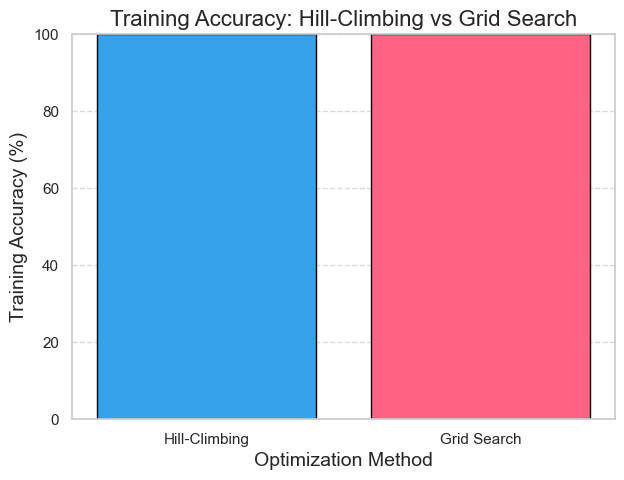

In [16]:
best_accuracy = 1
best_grid_acc = 1

accuracies = [best_accuracy * 100, best_grid_acc * 100]
methods = ['Hill-Climbing', 'Grid Search']

plt.figure(figsize=(7, 5))  
plt.bar(methods, accuracies, color=['#36A2EB', '#FF6384'], edgecolor='black')

plt.title('Training Accuracy: Hill-Climbing vs Grid Search', fontsize=16)
plt.xlabel('Optimization Method', fontsize=14)
plt.ylabel('Training Accuracy (%)', fontsize=14)

plt.ylim(0, 100)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

compare between hill climbing and grid search from **Number of Evaluations**

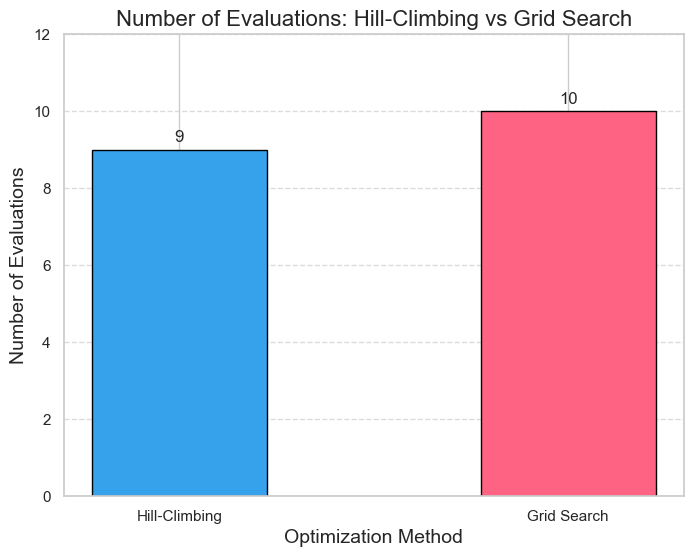

In [17]:
hill_evaluations = 9  
grid_evaluations = 10  

evaluations = [hill_evaluations, grid_evaluations]
methods = ['Hill-Climbing', 'Grid Search']

plt.figure(figsize=(8, 6)) 
plt.bar(methods, evaluations, color=['#36A2EB', '#FF6384'], edgecolor='black', width=0.45)

plt.title('Number of Evaluations: Hill-Climbing vs Grid Search', fontsize=16)
plt.xlabel('Optimization Method', fontsize=14)
plt.ylabel('Number of Evaluations', fontsize=14)

for i, v in enumerate(evaluations):
    plt.text(i, v + 0.2, f'{v}', ha='center', fontsize=12)

plt.ylim(0, 12) 

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

 Visualize the **Final Tree**

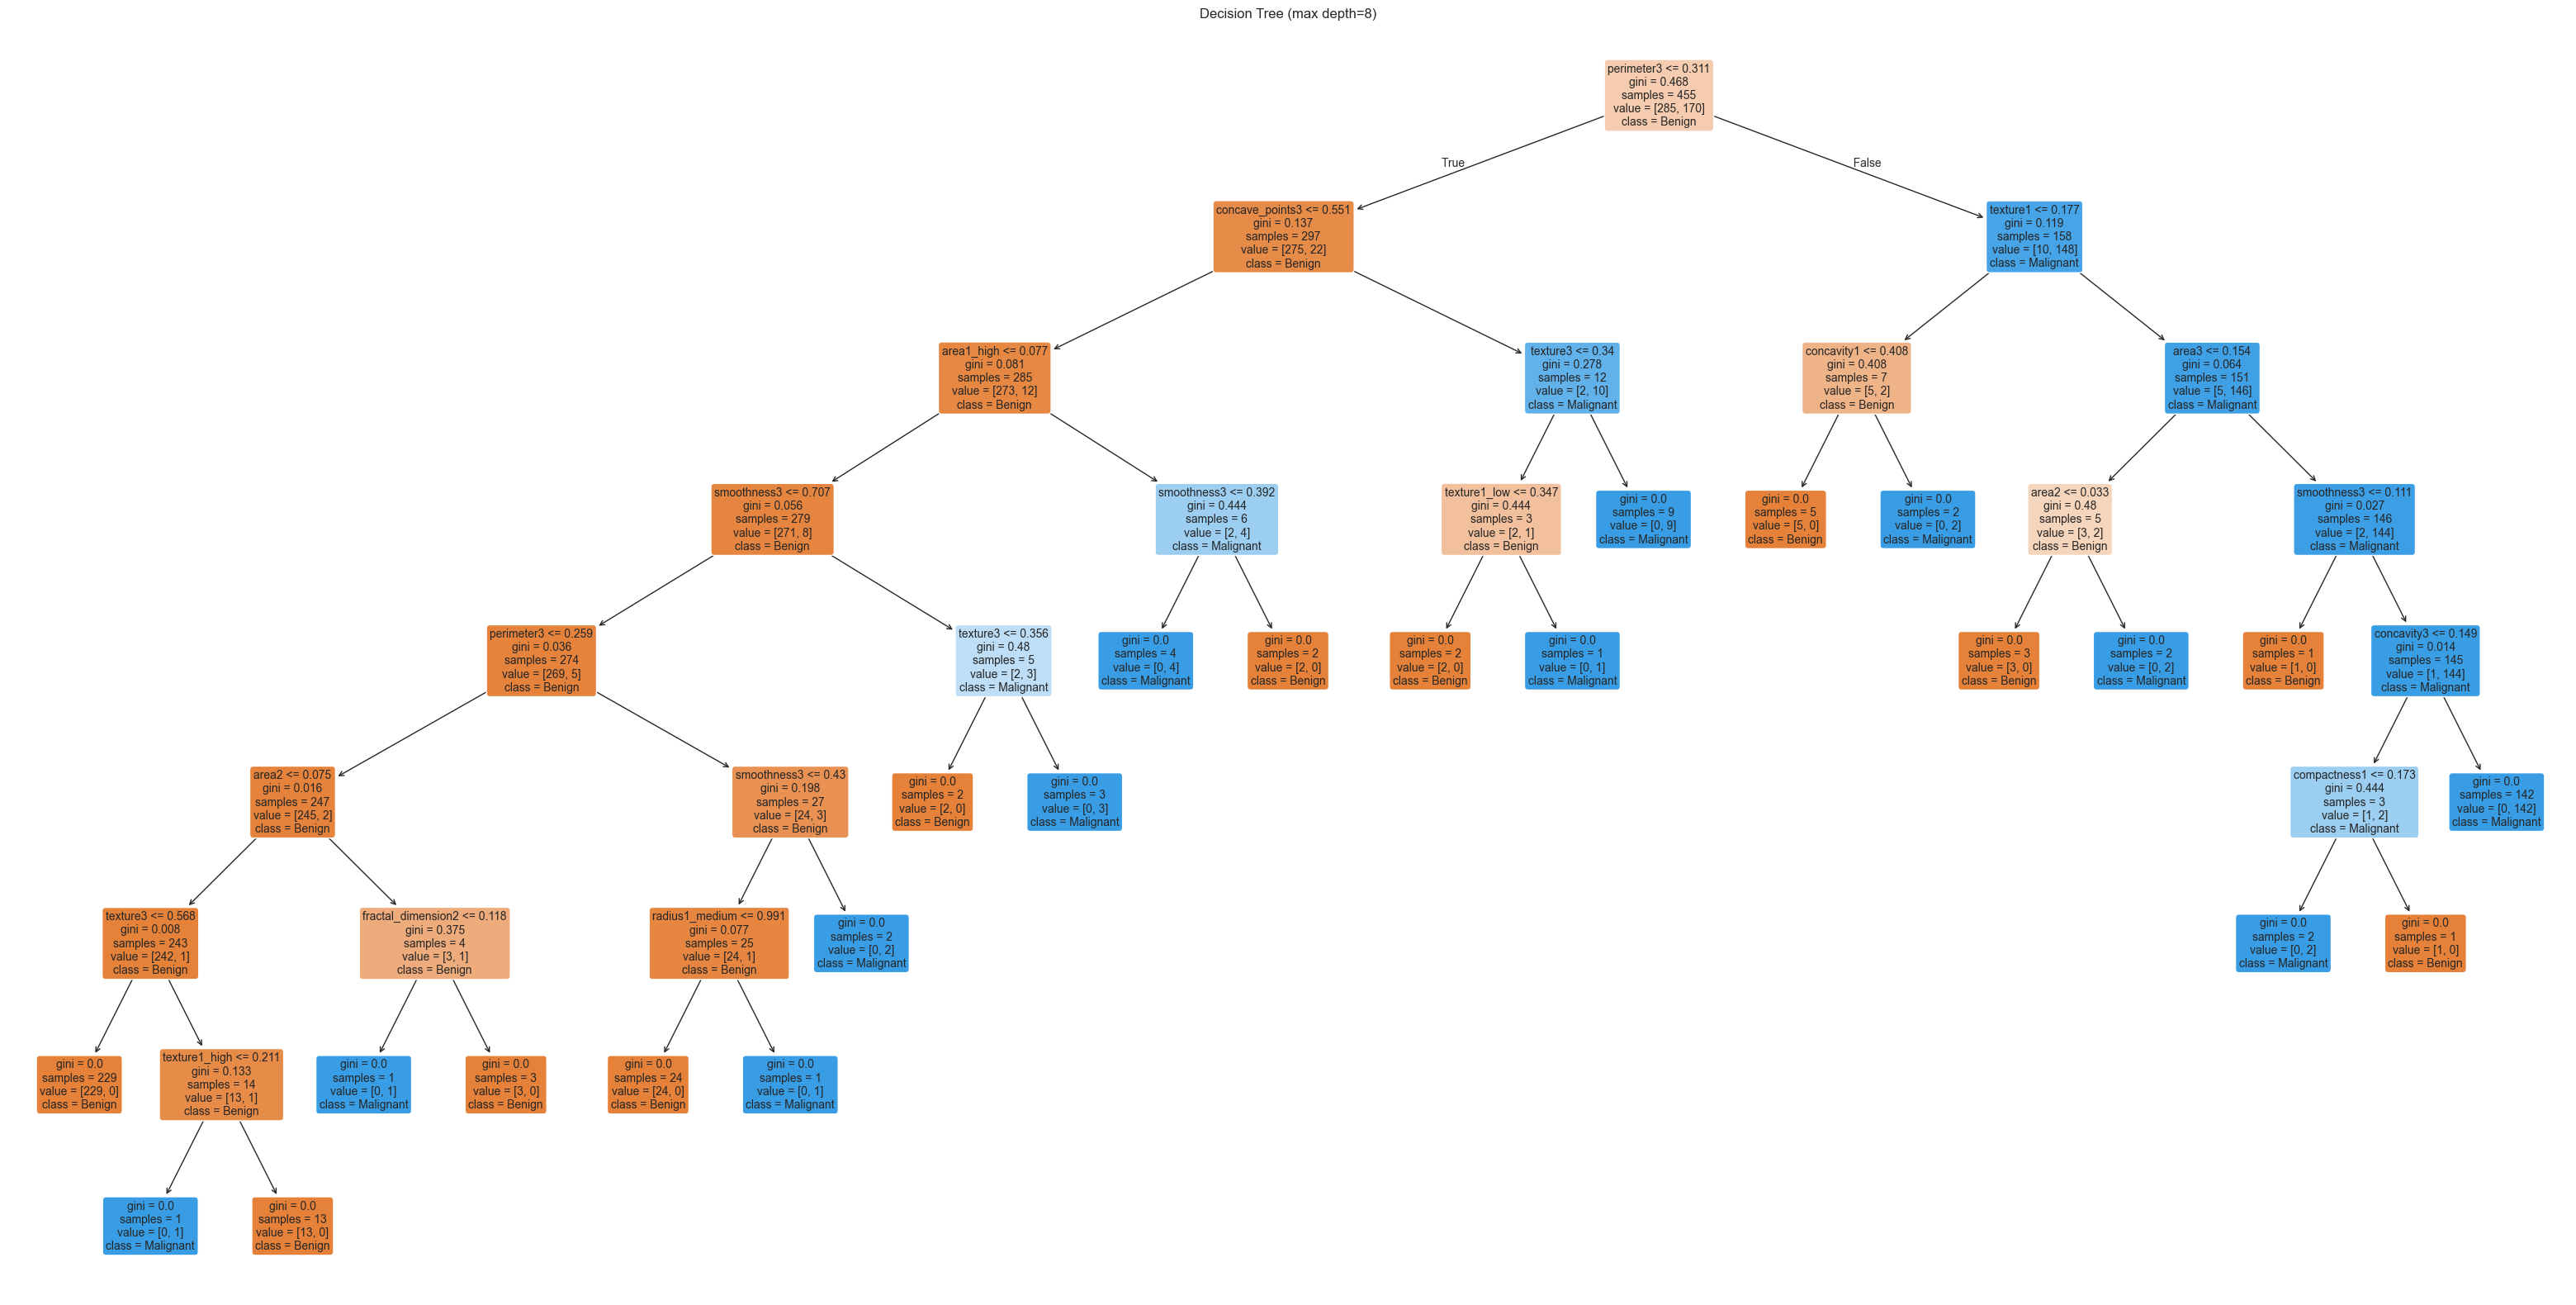

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

depth = 8
#! تدريب النموذج
final_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
final_model.fit(X_train_final, y_train)

plt.figure(figsize=(40, 20))  

plot_tree(final_model,
          feature_names=X_train_final.columns,
          class_names=["Benign", "Malignant"],
          filled=True,
          rounded=True,
          fontsize=10)

plt.title(f"Decision Tree (max depth={depth})")

plt.show()

## 🔹**Evaluate**Test Set and **Report** Metrics

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# توقعات النموذج النهائي
y_test_pred = final_model.predict(X_test_final)

#? 1.Accuracy
acc = accuracy_score(y_test, y_test_pred) #& صنف 93% من الحالات صح سواء خبيثة أو حميدة

#? 2.Precision & Recall (لكل فئة)
prec = precision_score(y_test, y_test_pred) #& من بين كل الحالات اللي صنفها على إنها خبيثة 88.6%  منهم فعلاً خبيث
rec = recall_score(y_test, y_test_pred) #& من كل الحالات الخبيثة الحقيقية النموذج اكتشف 92.8% منهم

#? 3.Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred) 
#! خمسه حميده قال عليهم خبيثه
#! تلاته خبيثه قل عليهم حميده  

# 4. تقرير مفصل
report = classification_report(y_test, y_test_pred, target_names=["Benign", "Malignant"])

print("=== Final Evaluation on Test Set ===")
print(f"Accuracy: {acc:.4f}")
print(f"Precision (Malignant class): {prec:.4f}")
print(f"Recall (Malignant class): {rec:.4f}")
print(f"\nConfusion Matrix: \n{cm}")
print(f"\nDetailed Classification Report: \n{report}")

=== Final Evaluation on Test Set ===
Accuracy: 0.9298
Precision (Malignant class): 0.8864
Recall (Malignant class): 0.9286

Confusion Matrix: 
[[67  5]
 [ 3 39]]

Detailed Classification Report: 
              precision    recall  f1-score   support

      Benign       0.96      0.93      0.94        72
   Malignant       0.89      0.93      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



make heat map for **confusion matrix**

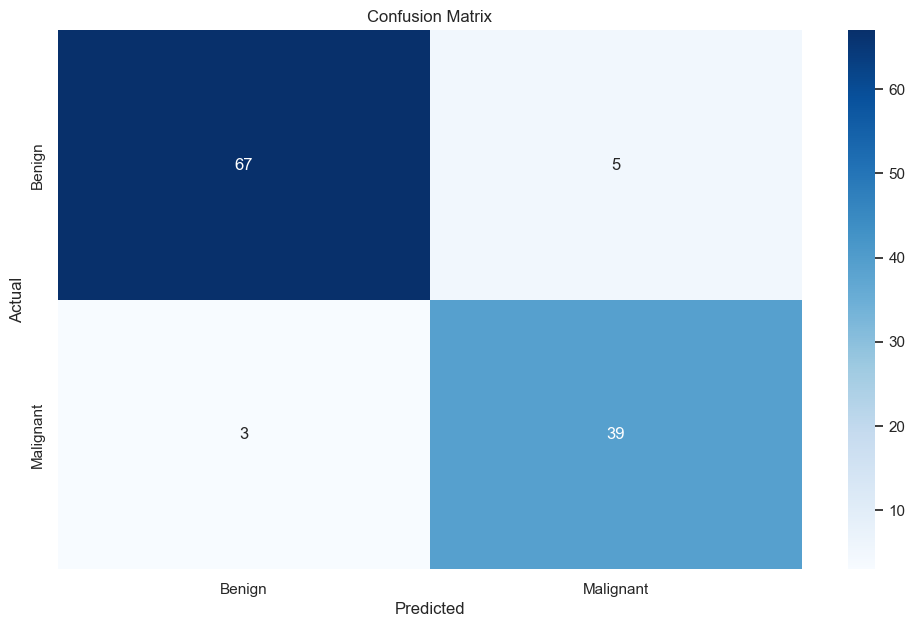

In [20]:
cm = np.array([[67, 5], [3, 39]])
plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

make piechart for the **M&B output**

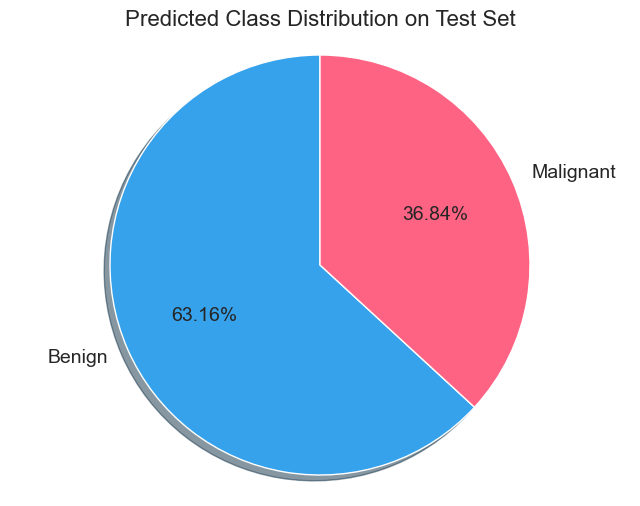

In [21]:
benign_pred = 72     #* 67 (صحيح) + 5 (خطأ)
malignant_pred = 42  #* 3 (خطأ) + 39 (صحيح)

labels = ['Benign', 'Malignant']
sizes = [benign_pred, malignant_pred]
colors = ['#36A2EB', '#FF6384'] 

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', 
        shadow=True, startangle=90, textprops={'fontsize': 14})

plt.title('Predicted Class Distribution on Test Set', fontsize=16)

plt.axis('equal')

plt.show()